In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')
PATH='drive/MyDrive/enpm808w-datasets/quiz_bowl_data/'

Mounted at /content/drive/


## 1. Importing Training Data


In [3]:
df = pd.read_csv(PATH + 'qb.train.csv')
df.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


## 2. Building and Training Classifiers

### 2.1 Cleaning Training Data

In [4]:
df['tournaments_year'] = df['tournaments'].str[:4].astype(int)
df = pd.get_dummies(df, columns=['answer_type'])
df = pd.get_dummies(df, columns=['tournaments_year'])
df.drop(['row', 'page', 'answer', 'text', 'category', 'tournaments'], 1, inplace=True)
df['corr'] = df['corr'].map({True: 1, False: 0})
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,...,tournaments_year_2001,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010
0,127.398036,1,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50.212336,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44.767071,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44.058274,0,22,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,40.675249,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.shape

(8079, 24)

### 2.2 Splitting Data Into Training and Testing

In [6]:
from sklearn.model_selection import train_test_split

x = df.drop('corr', 1)
y = df['corr']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.2 Training Various Classification Models

#### 2.2.1 Training Logistic Regression Model

In [7]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(x_train, y_train)
logistic_score = logistic_model.score(x_test, y_test)
logistic_score = round(logistic_score, 3)

print('The accuracy of the Logistic Regression model is: ', logistic_score)

The accuracy of the Logistic Regression model is:  0.658


#### 2.2.2 Training SVM Model

In [8]:
from sklearn.svm import SVC
svm_model = SVC(C=100)
# svm_model = SVC(kernel='poly', C=100)
svm_model.fit(x_train, y_train)

SVC(C=100)

In [9]:
svm_score = svm_model.score(x_test, y_test)
svm_score = round(svm_score, 3)
print('The accuracy of the SVM model is: ', svm_score)

The accuracy of the SVM model is:  0.754


#### 2.2.3 Training Decision Tree Model

In [10]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
tree_score = tree_model.score(x_test, y_test)
tree_score = round(tree_score, 3)
print('The accuracy of the Decision Tree model is: ', tree_score)

The accuracy of the Decision Tree model is:  0.723


#### 2.2.4 Training Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=30)
forest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30)

In [13]:
forest_score = forest_model.score(x_test, y_test)
forest_score = round(forest_score, 3)
print('The accuracy of the Decision Tree model is: ', forest_score)

The accuracy of the Decision Tree model is:  0.752


### 2.3 Comparing Model Accuracies

In [14]:
scores_by_model = {
  "Logistic Regression": logistic_score,
  "SVM": svm_score,
  "Decision Tree": tree_score,
  "Random Forest": forest_score,
}

for key, value in scores_by_model.items(): 
  print(key, ':', value)

Logistic Regression : 0.658
SVM : 0.754
Decision Tree : 0.723
Random Forest : 0.752


## 3. Improving Prediction Accuracy

### 3.1 Extracting New Feature

In [15]:
df_new = pd.read_csv(PATH + 'qb.train.csv')
df_new.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


In [16]:
df_new['tournaments_year'] = df_new['tournaments'].str[:4].astype(int)
df_new = pd.get_dummies(df_new, columns=['answer_type'])
df_new = pd.get_dummies(df_new, columns=['tournaments_year'])

In [17]:
df_new['text_length'] = df_new['text'].str.len()
df_new.head()

,row,body_score,page,answer,text,category,tournaments,corr,inlinks,answer_type_None,...,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,True,62,0,...,0,0,0,0,0,0,0,0,0,352
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,5,1,...,0,0,0,0,0,0,0,0,0,352
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,6,1,...,0,0,0,0,0,0,0,0,0,352
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,22,0,...,0,0,0,0,0,0,0,1,0,327
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,0,1,...,0,0,0,0,0,0,0,1,0,327


In [18]:
df_new['corr'] = df_new['corr'].map({True: 1, False: 0})
df_new.drop(['row', 'page', 'answer', 'text', 'category', 'tournaments'], 1, inplace=True)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,...,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length
0,127.398036,1,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
1,50.212336,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
2,44.767071,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
3,44.058274,0,22,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,327
4,40.675249,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,327


### 3.2 Training All Models Again (With New Feature)

In [19]:
x_new = df_new.drop('corr', 1)
y_new = df_new['corr']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new, y_new, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [20]:
logistic_model.fit(x_train2, y_train2)
logistic_score2 = round(logistic_model.score(x_test2, y_test2), 3)

In [21]:
svm_model.fit(x_train2, y_train2)
svm_score2 = round(svm_model.score(x_test2, y_test2), 3)

In [22]:
tree_model.fit(x_train2, y_train2)

tree_score2 = round(tree_model.score(x_test2, y_test2), 3)

In [23]:
forest_model.fit(x_train2, y_train2)
forest_score2 = round(forest_model.score(x_test2, y_test2), 3)

In [24]:
scores_by_model2 = {
  "Logistic Regression": [logistic_score, logistic_score2],
  "SVM": [svm_score, svm_score2],
  "Decision Tree": [tree_score, tree_score2],
  "Random Forest": [forest_score, forest_score2],
}

for key, value in scores_by_model2.items(): 
  print(key, ':', value)

Logistic Regression : [0.658, 0.691]
SVM : [0.754, 0.761]
Decision Tree : [0.723, 0.749]
Random Forest : [0.752, 0.814]


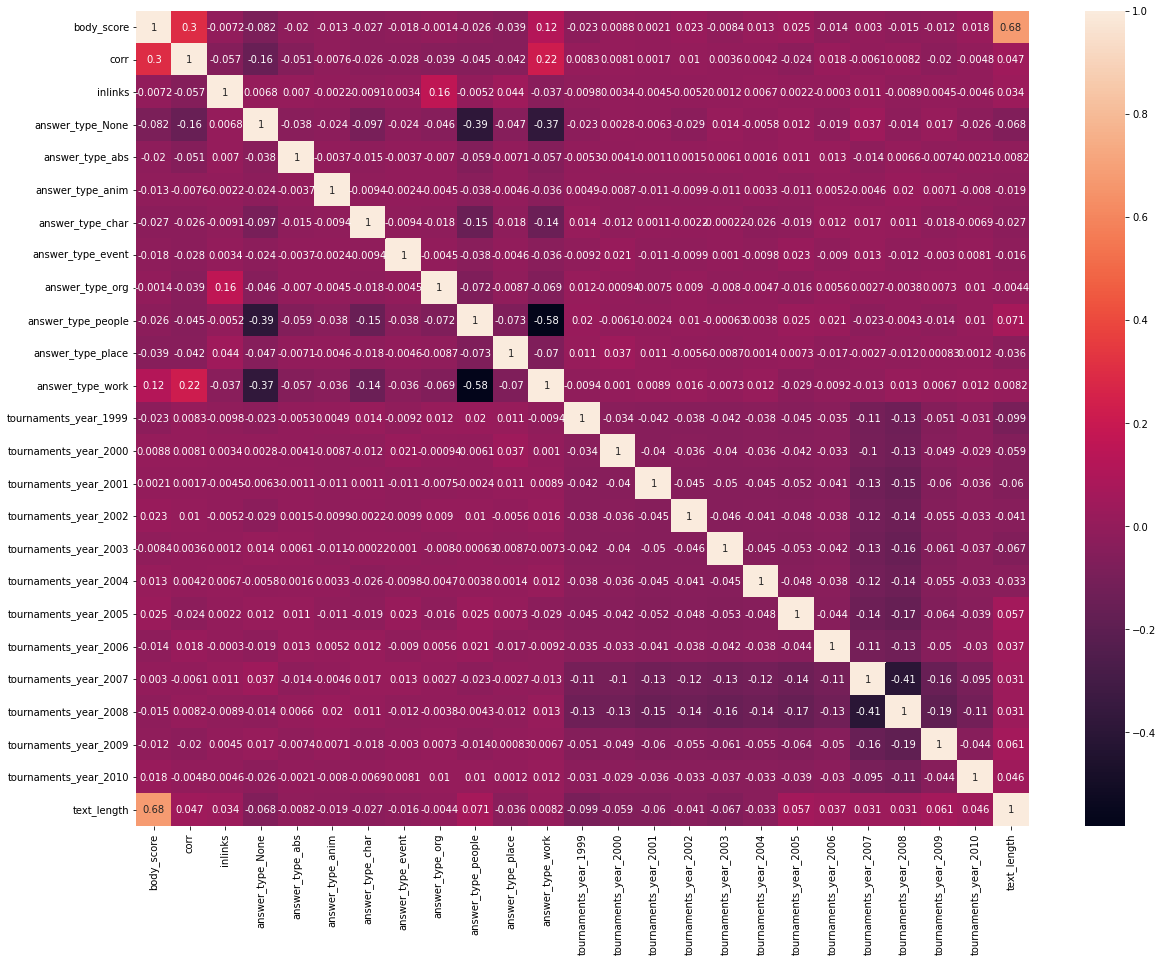

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),annot=True)

## 4. Predicting on Test Data and Uploading to Kaggle

### 4.1 Importing and Cleaning Testing Data

In [25]:
df2 = pd.read_csv(PATH+'qb.test.csv')
df2.head()

,row,body_score,page,text,category,tournaments,answer_type,inlinks
0,31,40.023617,Death in Venice,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,4
1,32,27.538799,The Eye of the World,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,1
2,33,26.976121,Carmilla,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,2
3,88,45.848831,A Passage to India,In a symbolic incident in this novel Ronny Hea...,Literature,2001 ACF Regionals,work,5
4,91,99.811169,The Cherry Orchard,"We first meet Fiers, the aging footman, in Act...",Literature,2001 ACF Regionals,work,11


In [26]:
df2['tournaments_year'] = df2['tournaments'].str[:4].astype(int)
df2['text_length'] = df2['text'].str.len() #new feature

df2.drop(['page', 'text', 'category', 'tournaments'], 1, inplace=True)

df2 = pd.get_dummies(df2, columns=['answer_type'])
df2 = pd.get_dummies(df2, columns=['tournaments_year'])

df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,row,body_score,inlinks,text_length,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,...,tournaments_year_2001,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010
0,31,40.023617,4,245,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,32,27.538799,1,245,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,33,26.976121,2,245,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,88,45.848831,5,127,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,91,99.811169,11,551,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
df2.shape

(887, 25)

In [28]:
guess_df = pd.DataFrame()
guess_df['row'] = df2['row']
df2.drop('row', 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
guess_df.head()

,row
0,31
1,32
2,33
3,88
4,91


### 4.2 Predicting on Test Data

In [30]:
# pred = svm_model.predict(df2)
pred = forest_model.predict(df2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [31]:
guess_df['corr'] = pred
guess_df['corr'] = guess_df['corr'].map({0: False, 1: True})
guess_df.head()

,row,corr
0,31,False
1,32,False
2,33,False
3,88,False
4,91,True


### 4.3 Downloading Predictions 

In [32]:
guess_df.to_csv(PATH+'qb.guess.csv', index = False)
from google.colab import files
files.download('qb.guess.csv') # Uploaded this file to Kaggle

FileNotFoundError: ignored